# Wearable - EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Análise Exploratória

### All Participants

In [3]:
all_data = pd.read_parquet("../data/data_processed/participants/Participants_all.parquet")
all_data.head()

,pid,window_start,window_end,n_samples,duration_seconds,sex,age_group,label:Walmsley2020,label:Walmsley2020_enc,label:WillettsSpecific2018,label:WillettsSpecific2018_enc,label:WillettsMET2018,label:WillettsMET2018_enc,x_mean,x_std,x_min,x_max,y_mean,y_std,y_min,y_max,z_mean,z_std,z_min,z_max,energy_x,energy_y,energy_z,energy_total,magnitude_mean,corr_xy,corr_xz,corr_yz,fft_dom_freq,fft_peak_power,hour_sin,hour_cos
0,P001,2016-11-13 02:18:00,2016-11-13 02:18:05,500,4.99,1,2,sleep,3,sleep,5,sleep,5,-0.468161,0.004565,-0.482334,-0.46669,-0.537512,0.006892,-0.548902,-0.533341,0.657518,0.003960,0.643077,0.673867,0.219195,0.288966,0.432345,0.940507,0.969787,-0.148480,-0.077644,0.275487,0.4,0.000005,0.566406,0.824126
1,P001,2016-11-13 02:18:05,2016-11-13 02:18:10,500,4.99,1,2,sleep,3,sleep,5,sleep,5,-0.470069,0.006437,-0.482334,-0.46669,-0.537045,0.006771,-0.548902,-0.517780,0.657702,0.003627,0.643077,0.673867,0.221007,0.288463,0.432585,0.942055,0.970582,-0.108382,-0.028882,0.137541,3.6,0.000008,0.566706,0.823920
2,P001,2016-11-13 02:18:10,2016-11-13 02:18:15,500,4.99,1,2,sleep,3,sleep,5,sleep,5,-0.469694,0.006162,-0.482334,-0.46669,-0.537947,0.007104,-0.548902,-0.533341,0.657764,0.003369,0.643077,0.673867,0.220650,0.289438,0.432665,0.942753,0.970944,-0.260468,-0.079268,0.204062,0.4,0.000002,0.567005,0.823714
3,P001,2016-11-13 02:18:15,2016-11-13 02:18:20,500,4.99,1,2,sleep,3,sleep,5,sleep,5,-0.469287,0.005821,-0.482334,-0.46669,-0.537512,0.006962,-0.548902,-0.517780,0.657733,0.003567,0.643077,0.673867,0.220264,0.288967,0.432626,0.941857,0.970483,-0.243211,-0.092415,0.223157,0.4,0.000001,0.567305,0.823508
4,P001,2016-11-13 02:18:20,2016-11-13 02:18:25,500,4.99,1,2,sleep,3,sleep,5,sleep,5,-0.470820,0.006896,-0.482334,-0.46669,-0.535333,0.005291,-0.548902,-0.517780,0.658226,0.002743,0.643077,0.673867,0.221719,0.286609,0.433269,0.941597,0.970350,-0.225457,-0.079250,0.230302,8.8,0.000002,0.567604,0.823302


In [4]:
all_data.shape

(1858491, 37)

In [5]:
all_data.columns

Index(['pid', 'window_start', 'window_end', 'n_samples', 'duration_seconds',
       'sex', 'age_group', 'label:Walmsley2020', 'label:Walmsley2020_enc',
       'label:WillettsSpecific2018', 'label:WillettsSpecific2018_enc',
       'label:WillettsMET2018', 'label:WillettsMET2018_enc', 'x_mean', 'x_std',
       'x_min', 'x_max', 'y_mean', 'y_std', 'y_min', 'y_max', 'z_mean',
       'z_std', 'z_min', 'z_max', 'energy_x', 'energy_y', 'energy_z',
       'energy_total', 'magnitude_mean', 'corr_xy', 'corr_xz', 'corr_yz',
       'fft_dom_freq', 'fft_peak_power', 'hour_sin', 'hour_cos'],
      dtype='object')

### Filtered Data

In [6]:
all_data_filtered = all_data.drop(columns=['pid', 'window_start', 'window_end', 'n_samples', 'duration_seconds', 'label:Walmsley2020', 'label:Walmsley2020_enc',
       'label:WillettsSpecific2018', 'label:WillettsSpecific2018_enc'])

In [7]:
all_data_filtered.head()

,sex,age_group,label:WillettsMET2018,label:WillettsMET2018_enc,x_mean,x_std,x_min,x_max,y_mean,y_std,y_min,y_max,z_mean,z_std,z_min,z_max,energy_x,energy_y,energy_z,energy_total,magnitude_mean,corr_xy,corr_xz,corr_yz,fft_dom_freq,fft_peak_power,hour_sin,hour_cos
0,1,2,sleep,5,-0.468161,0.004565,-0.482334,-0.46669,-0.537512,0.006892,-0.548902,-0.533341,0.657518,0.003960,0.643077,0.673867,0.219195,0.288966,0.432345,0.940507,0.969787,-0.148480,-0.077644,0.275487,0.4,0.000005,0.566406,0.824126
1,1,2,sleep,5,-0.470069,0.006437,-0.482334,-0.46669,-0.537045,0.006771,-0.548902,-0.517780,0.657702,0.003627,0.643077,0.673867,0.221007,0.288463,0.432585,0.942055,0.970582,-0.108382,-0.028882,0.137541,3.6,0.000008,0.566706,0.823920
2,1,2,sleep,5,-0.469694,0.006162,-0.482334,-0.46669,-0.537947,0.007104,-0.548902,-0.533341,0.657764,0.003369,0.643077,0.673867,0.220650,0.289438,0.432665,0.942753,0.970944,-0.260468,-0.079268,0.204062,0.4,0.000002,0.567005,0.823714
3,1,2,sleep,5,-0.469287,0.005821,-0.482334,-0.46669,-0.537512,0.006962,-0.548902,-0.517780,0.657733,0.003567,0.643077,0.673867,0.220264,0.288967,0.432626,0.941857,0.970483,-0.243211,-0.092415,0.223157,0.4,0.000001,0.567305,0.823508
4,1,2,sleep,5,-0.470820,0.006896,-0.482334,-0.46669,-0.535333,0.005291,-0.548902,-0.517780,0.658226,0.002743,0.643077,0.673867,0.221719,0.286609,0.433269,0.941597,0.970350,-0.225457,-0.079250,0.230302,8.8,0.000002,0.567604,0.823302


In [8]:
all_data_filtered.columns

Index(['sex', 'age_group', 'label:WillettsMET2018',
       'label:WillettsMET2018_enc', 'x_mean', 'x_std', 'x_min', 'x_max',
       'y_mean', 'y_std', 'y_min', 'y_max', 'z_mean', 'z_std', 'z_min',
       'z_max', 'energy_x', 'energy_y', 'energy_z', 'energy_total',
       'magnitude_mean', 'corr_xy', 'corr_xz', 'corr_yz', 'fft_dom_freq',
       'fft_peak_power', 'hour_sin', 'hour_cos'],
      dtype='object')

In [9]:
all_data_filtered.isna().sum()

sex                             0
age_group                       0
label:WillettsMET2018           0
label:WillettsMET2018_enc       0
x_mean                          0
x_std                           0
x_min                           0
x_max                           0
y_mean                          0
y_std                           0
y_min                           0
y_max                           0
z_mean                          0
z_std                           0
z_min                           0
z_max                           0
energy_x                        0
energy_y                        0
energy_z                        0
energy_total                    0
magnitude_mean                  0
corr_xy                      7795
corr_xz                      4431
corr_yz                      4337
fft_dom_freq                    0
fft_peak_power                  0
hour_sin                        0
hour_cos                        0
dtype: int64

In [10]:
all_data_filtered = all_data_filtered.fillna(0)

In [11]:
all_data_filtered.isna().sum()

sex                          0
age_group                    0
label:WillettsMET2018        0
label:WillettsMET2018_enc    0
x_mean                       0
x_std                        0
x_min                        0
x_max                        0
y_mean                       0
y_std                        0
y_min                        0
y_max                        0
z_mean                       0
z_std                        0
z_min                        0
z_max                        0
energy_x                     0
energy_y                     0
energy_z                     0
energy_total                 0
magnitude_mean               0
corr_xy                      0
corr_xz                      0
corr_yz                      0
fft_dom_freq                 0
fft_peak_power               0
hour_sin                     0
hour_cos                     0
dtype: int64

In [12]:
all_data_filtered["label:WillettsMET2018"].value_counts(normalize=True, ascending=False)

label:WillettsMET2018
sleep                   0.368932
sitstand+lowactivity    0.289569
sitstand+activity       0.161256
walking                 0.060646
walking+activity        0.044148
vehicle                 0.038028
sitting                 0.020252
bicycling               0.009649
sports                  0.003902
gym                     0.001998
standing                0.001621
Name: proportion, dtype: float64

### Perfil Demografico

In [13]:
all_data_filtered.groupby("sex").size()

sex
0     629485
1    1229006
dtype: int64

In [14]:
all_data_filtered.groupby("age_group").size()

age_group
0    519182
1    465884
2    463367
3    410058
dtype: int64

### Feature-Level EDA

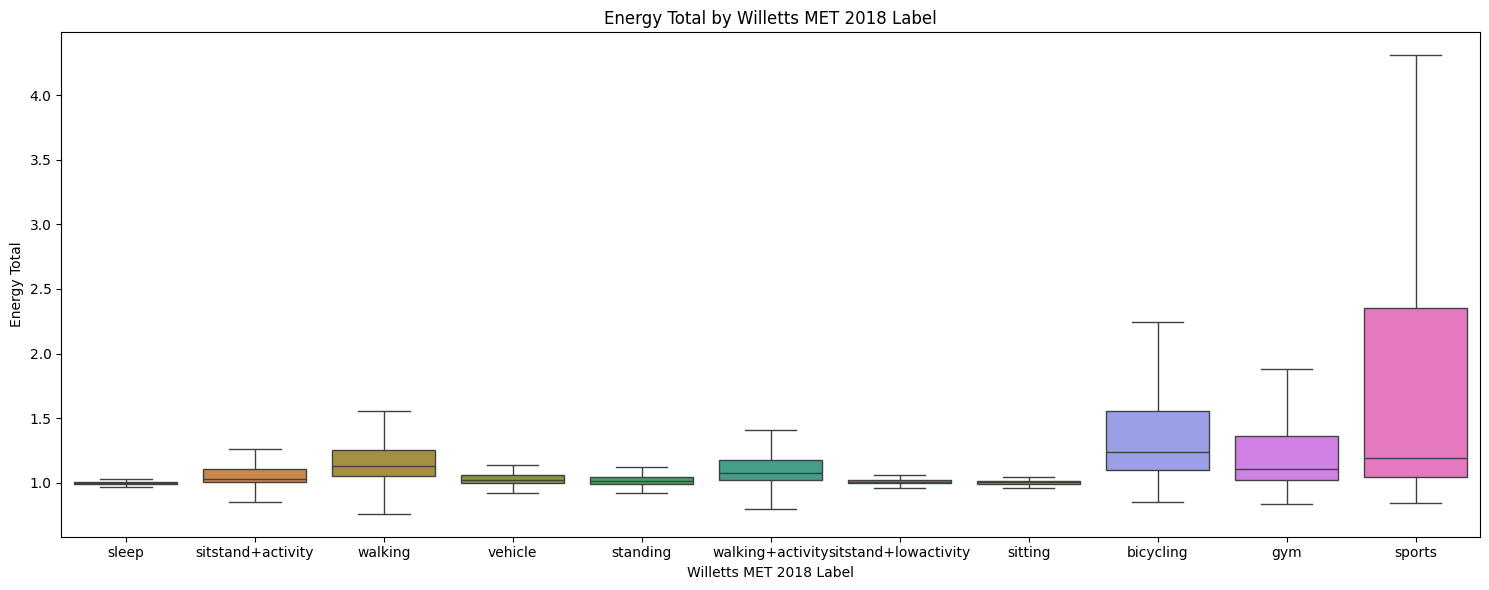

In [15]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=all_data_filtered, x="label:WillettsMET2018", y="energy_total", hue="label:WillettsMET2018", showfliers=False);
plt.title('Energy Total by Willetts MET 2018 Label')
plt.xlabel('Willetts MET 2018 Label')
plt.ylabel('Energy Total')
plt.tight_layout()
plt.show()

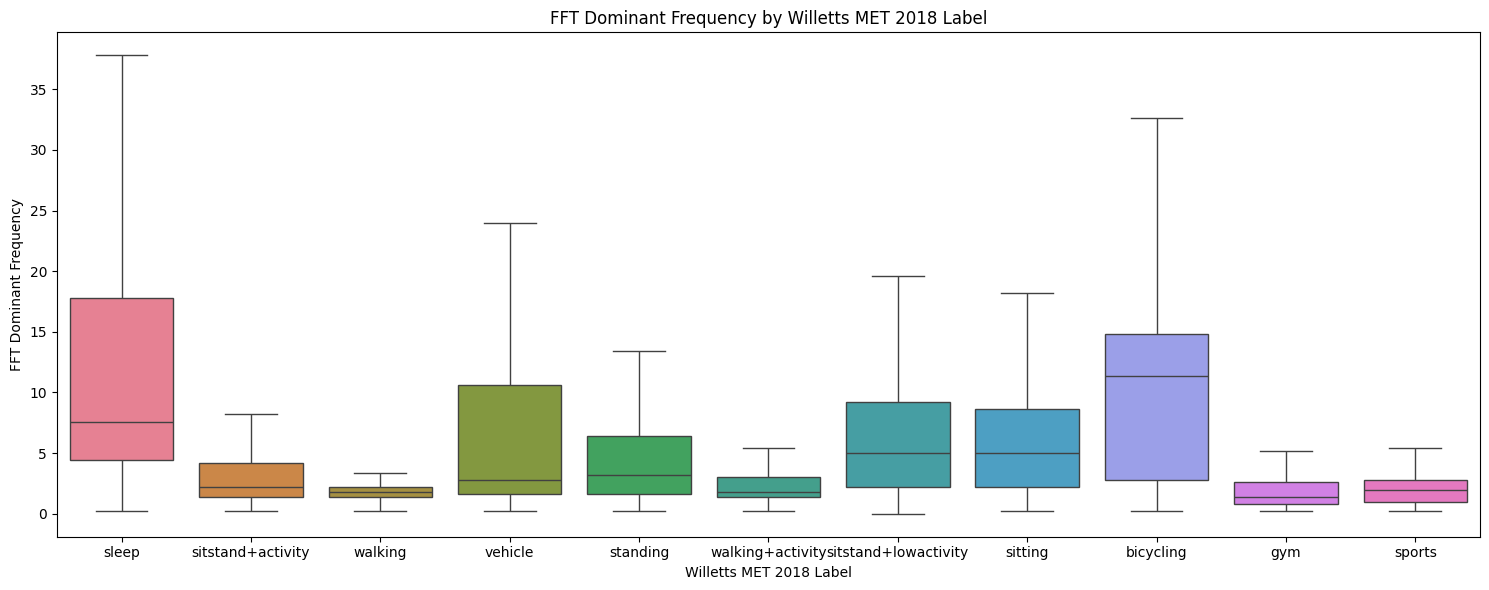

In [16]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=all_data_filtered, x="label:WillettsMET2018", y="fft_dom_freq", showfliers=False, hue="label:WillettsMET2018");
plt.title('FFT Dominant Frequency by Willetts MET 2018 Label')
plt.xlabel('Willetts MET 2018 Label')
plt.ylabel('FFT Dominant Frequency')
plt.tight_layout()
plt.show()

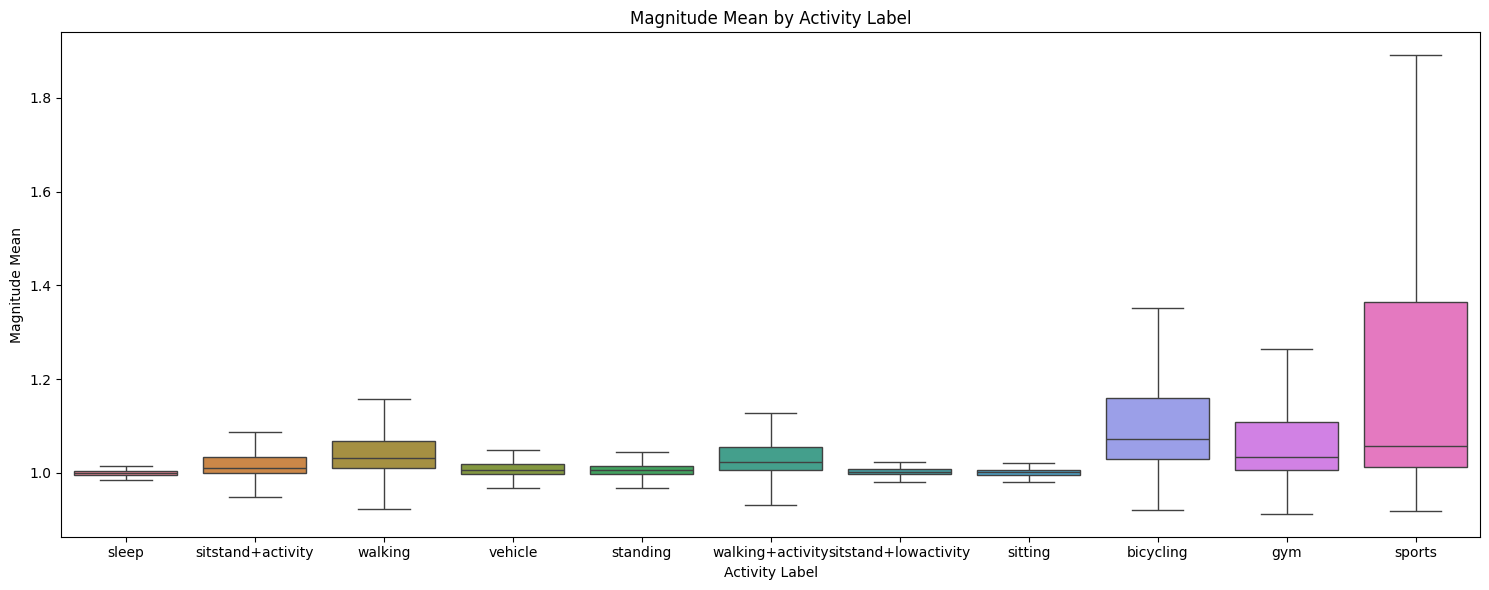

In [17]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="label:WillettsMET2018", y="magnitude_mean", data=all_data_filtered, showfliers=False, hue="label:WillettsMET2018");
plt.title('Magnitude Mean by Activity Label')
plt.xlabel('Activity Label')
plt.ylabel('Magnitude Mean')
plt.tight_layout()
plt.show()

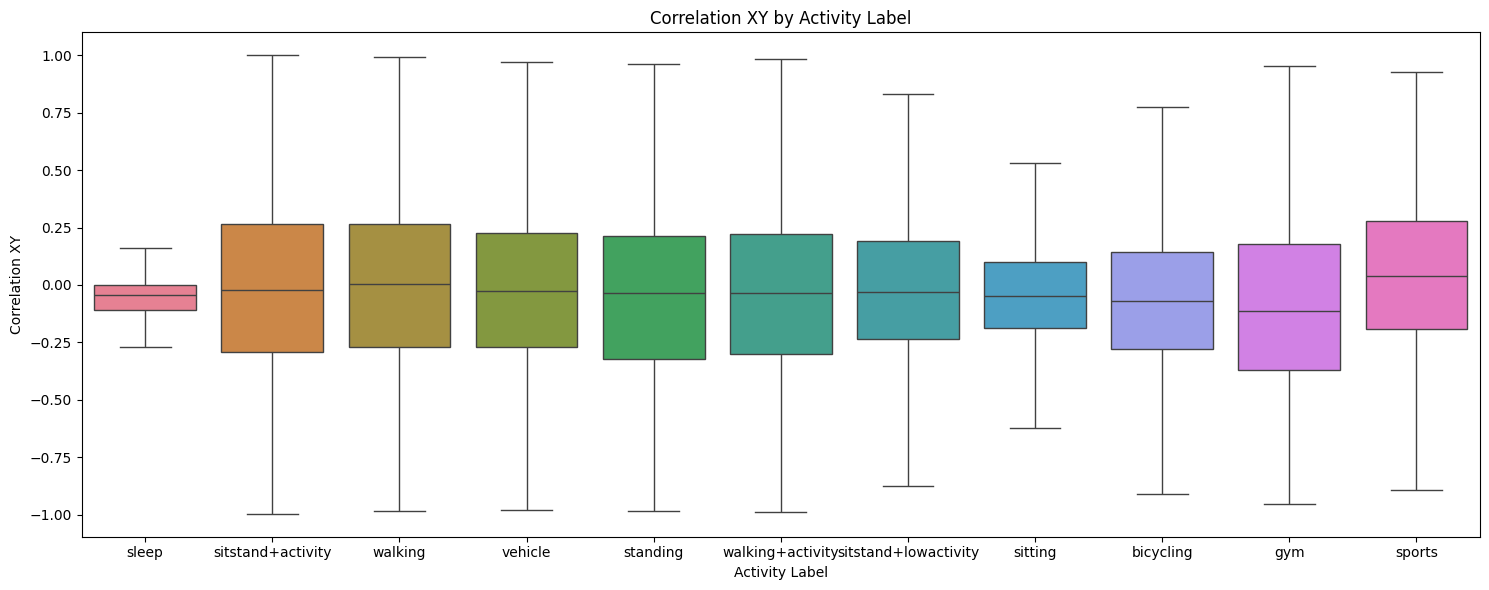

In [18]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="label:WillettsMET2018", y="corr_xy", data=all_data_filtered, showfliers=False, hue="label:WillettsMET2018");
plt.title('Correlation XY by Activity Label')
plt.xlabel('Activity Label')
plt.ylabel('Correlation XY')
plt.tight_layout()
plt.show()

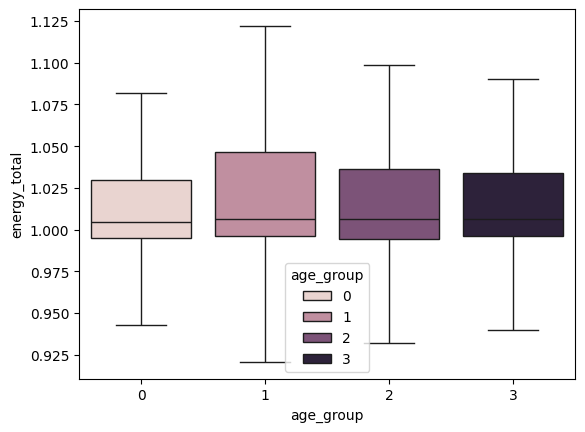

In [19]:
sns.boxplot(data=all_data_filtered, x="age_group", y="energy_total", showfliers=False, hue="age_group");

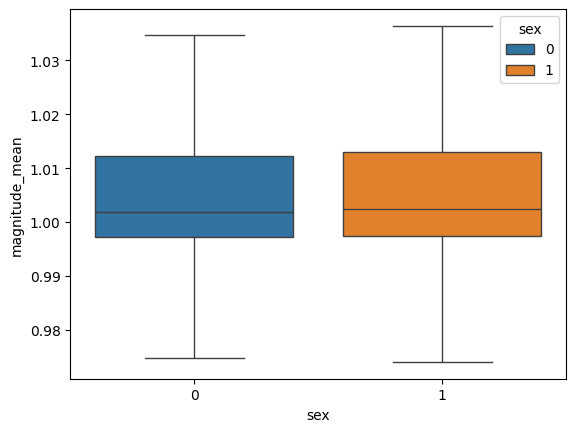

In [20]:
sns.boxplot(data=all_data_filtered, x="sex", y="magnitude_mean", showfliers=False, hue="sex");

### Preprocessamento / Normalização

In [21]:
all_data_filtered.columns

Index(['sex', 'age_group', 'label:WillettsMET2018',
       'label:WillettsMET2018_enc', 'x_mean', 'x_std', 'x_min', 'x_max',
       'y_mean', 'y_std', 'y_min', 'y_max', 'z_mean', 'z_std', 'z_min',
       'z_max', 'energy_x', 'energy_y', 'energy_z', 'energy_total',
       'magnitude_mean', 'corr_xy', 'corr_xz', 'corr_yz', 'fft_dom_freq',
       'fft_peak_power', 'hour_sin', 'hour_cos'],
      dtype='object')

In [22]:
SEX_MAP = {0: 'M', 1: 'F'}
AGE_MAP = {0: '18-29', 1: '30-37', 2: '38-52', 3: '53+'}

In [23]:
all_data_filtered["age_group"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1858491 entries, 0 to 1858490
Series name: age_group
Non-Null Count    Dtype
--------------    -----
1858491 non-null  int64
dtypes: int64(1)
memory usage: 14.2 MB


In [24]:
all_data_filtered["age_group"]= all_data_filtered["age_group"].map(AGE_MAP)
all_data_filtered["sex"] = all_data_filtered["sex"].map(SEX_MAP)

In [25]:
all_data_filtered.head()

,sex,age_group,label:WillettsMET2018,label:WillettsMET2018_enc,x_mean,x_std,x_min,x_max,y_mean,y_std,y_min,y_max,z_mean,z_std,z_min,z_max,energy_x,energy_y,energy_z,energy_total,magnitude_mean,corr_xy,corr_xz,corr_yz,fft_dom_freq,fft_peak_power,hour_sin,hour_cos
0,F,38-52,sleep,5,-0.468161,0.004565,-0.482334,-0.46669,-0.537512,0.006892,-0.548902,-0.533341,0.657518,0.003960,0.643077,0.673867,0.219195,0.288966,0.432345,0.940507,0.969787,-0.148480,-0.077644,0.275487,0.4,0.000005,0.566406,0.824126
1,F,38-52,sleep,5,-0.470069,0.006437,-0.482334,-0.46669,-0.537045,0.006771,-0.548902,-0.517780,0.657702,0.003627,0.643077,0.673867,0.221007,0.288463,0.432585,0.942055,0.970582,-0.108382,-0.028882,0.137541,3.6,0.000008,0.566706,0.823920
2,F,38-52,sleep,5,-0.469694,0.006162,-0.482334,-0.46669,-0.537947,0.007104,-0.548902,-0.533341,0.657764,0.003369,0.643077,0.673867,0.220650,0.289438,0.432665,0.942753,0.970944,-0.260468,-0.079268,0.204062,0.4,0.000002,0.567005,0.823714
3,F,38-52,sleep,5,-0.469287,0.005821,-0.482334,-0.46669,-0.537512,0.006962,-0.548902,-0.517780,0.657733,0.003567,0.643077,0.673867,0.220264,0.288967,0.432626,0.941857,0.970483,-0.243211,-0.092415,0.223157,0.4,0.000001,0.567305,0.823508
4,F,38-52,sleep,5,-0.470820,0.006896,-0.482334,-0.46669,-0.535333,0.005291,-0.548902,-0.517780,0.658226,0.002743,0.643077,0.673867,0.221719,0.286609,0.433269,0.941597,0.970350,-0.225457,-0.079250,0.230302,8.8,0.000002,0.567604,0.823302


#### Separação das features e target

In [26]:
TARGET_COL = "label:WillettsMET2018_enc"
ORIGINAL_LABEL = "label:WillettsMET2018"

categorical_features = ["sex", "age_group"]

numeric_features = [
    'x_mean', 'x_std', 'x_min', 'x_max',
    'y_mean', 'y_std', 'y_min', 'y_max',
    'z_mean', 'z_std', 'z_min', 'z_max',
    'energy_x', 'energy_y', 'energy_z', 'energy_total',
    'magnitude_mean', 'corr_xy', 'corr_xz', 'corr_yz',
    'fft_dom_freq', 'fft_peak_power', 'hour_sin', 'hour_cos'
]


#### Holdout Method

In [ ]:
X = all_data_filtered[categorical_features + numeric_features].copy()
y = all_data_filtered[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

#### Pipeline

In [28]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [29]:
preprocessor.fit(X_train)

X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

print("Train shape after preprocessing:", X_train_proc.shape)
print("Test shape after preprocessing:", X_test_proc.shape)

feature_names = preprocessor.get_feature_names_out()


Train shape after preprocessing: (1300943, 30)
Test shape after preprocessing: (557548, 30)


In [30]:
df_train_scaled = pd.DataFrame(X_train_proc, columns=feature_names)
df_train_scaled.head()

,num__x_mean,num__x_std,num__x_min,num__x_max,num__y_mean,num__y_std,num__y_min,num__y_max,num__z_mean,num__z_std,num__z_min,num__z_max,num__energy_x,num__energy_y,num__energy_z,num__energy_total,num__magnitude_mean,num__corr_xy,num__corr_xz,num__corr_yz,num__fft_dom_freq,num__fft_peak_power,num__hour_sin,num__hour_cos,cat__sex_F,cat__sex_M,cat__age_group_18-29,cat__age_group_30-37,cat__age_group_38-52,cat__age_group_53+
0,0.055864,-0.635505,0.400262,-0.355465,-0.943702,-0.564538,-0.203397,-1.059652,1.280932,-0.656809,1.284333,0.546754,-1.284754,-0.169000,1.373835,-0.203598,-0.233238,-0.069040,-0.073045,-0.032811,-0.500352,-0.138039,0.868848,1.052446,1.0,0.0,1.0,0.0,0.0,0.0
1,-1.114965,1.025827,-1.683599,0.193312,-0.503176,0.894064,-0.650784,0.228145,-0.216433,2.538989,-1.529628,0.287485,1.031161,-0.462078,-0.439835,0.242805,0.416471,-0.838400,-0.126544,-0.688331,-0.421696,-0.052866,0.670507,-1.170794,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.813092,1.217739,-2.092073,0.185812,-0.303793,2.120174,-1.719924,0.356538,0.778107,1.518224,-1.967615,1.205867,0.227186,-0.166760,0.357037,0.510592,0.797191,0.147855,0.663859,0.101556,-0.323376,0.029835,-0.038362,-1.360478,1.0,0.0,0.0,1.0,0.0,0.0
3,1.263456,2.347849,0.234114,1.617554,-0.898730,2.338608,-1.605793,0.161838,0.302191,0.712651,-0.108929,0.920349,0.469679,0.468328,-0.692431,0.326495,0.574268,2.388012,-1.120714,-1.103144,-0.657665,0.163089,-0.832361,-1.167493,1.0,0.0,0.0,0.0,1.0,0.0
4,1.471718,-0.404091,1.218795,0.818526,-0.600564,-0.348440,-0.207705,-0.684588,0.756531,-0.241223,0.690875,0.278757,0.393345,-0.558002,-0.039044,-0.202596,-0.234644,-1.865706,-2.075605,2.683416,-0.008750,-0.136660,-1.520595,0.273335,0.0,1.0,0.0,0.0,0.0,1.0


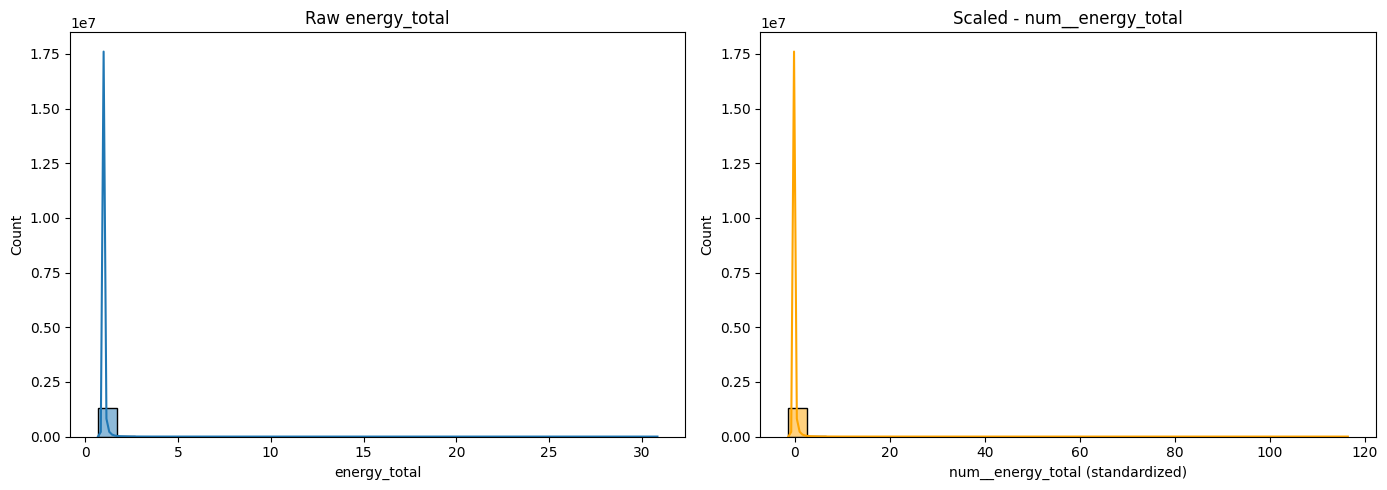

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(X_train["energy_total"], kde=True, bins=30)
plt.title("Raw energy_total")
plt.xlabel("energy_total")


plt.subplot(1,2,2)
sns.histplot(df_train_scaled["num__energy_total"], kde=True, bins=30, color="orange")
plt.title("Scaled - num__energy_total")
plt.xlabel("num__energy_total (standardized)")

plt.tight_layout()
plt.show()


In [38]:
X_train["energy_total"].describe()

count    1.300943e+06
mean     1.049159e+00
std      2.557005e-01
min      6.974409e-01
25%      9.955113e-01
50%      1.005933e+00
75%      1.035873e+00
max      3.083174e+01
Name: energy_total, dtype: float64

In [35]:
X_train["energy_total"].quantile([0.5, 0.9, 0.99, 0.999])

0.500    1.005933
0.900    1.137309
0.990    1.753308
0.999    4.331890
Name: energy_total, dtype: float64

In [36]:
X_train["energy_total"].sort_values(ascending=False).head(10)

1673085    30.831739
1624534    22.144742
1624493    21.929396
1623254    21.491287
1624623    21.270652
1623249    21.096465
1624524    21.048058
1623251    20.813446
1623253    20.750766
1624934    20.483032
Name: energy_total, dtype: float64

In [37]:
df_train_scaled["num__energy_total"].describe()

count    1.300943e+06
mean     2.570289e-15
std      1.000000e+00
min     -1.375509e+00
25%     -2.098069e-01
50%     -1.690479e-01
75%     -5.195943e-02
max      1.164745e+02
Name: num__energy_total, dtype: float64